In [13]:
# KHÔNG SỬ DỤNG THƯ VIỆN
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [14]:
# Tạo DataFrame
du_lieu = pd.read_csv(r"C:\Users\FPTSHOP\Downloads\du_lieu_gia_lap.csv")
print(du_lieu)

     So_bai_viet  So_binh_luan  So_luot_thich
0             88           183            386
1             78           198            218
2             64           188            376
3             92           198            299
4             57           124            432
..           ...           ...            ...
295           10            16             72
296           16            48             25
297            7            19             46
298            3            47             85
299            5            24             55

[300 rows x 3 columns]


In [15]:
# Gán nhãn cho các cụm
labels = ['Người dùng tích cực', 'Người dùng bình thường', 'Người dùng ít tích cực']

In [16]:
# Khởi tạo centroids
def initialize_centroids(du_lieu, k):
    indices = np.random.choice(du_lieu.shape[0], k, replace=False)
    return du_lieu[indices]

In [17]:
# Gán nhãn cho các điểm dữ liệu
def assign_clusters(du_lieu, centroids):
    clusters = []
    for point in du_lieu:
        distances = np.linalg.norm(point - centroids, axis=1)
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

In [18]:
def calculate_mse(data, centroids, clusters):
    mse = 0
    for i in range(len(data)):
        centroid = centroids[clusters[i]]
        mse += np.linalg.norm(data[i] - centroid) ** 2
    mse /= len(data)
    return mse


In [19]:

# K-means
def kmeans(du_lieu, k, max_iters=100):
    centroids = initialize_centroids(du_lieu, k)
    for _ in range(max_iters):
        clusters = assign_clusters(du_lieu, centroids)
        new_centroids = update_centroids(du_lieu, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters


In [23]:
# Áp dụng K-means
k = 3
centroids, clusters = kmeans(du_lieu, k)
# Trực quan hóa kết quả
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']

for i in range(k):
    clustered_du_lieu = du_lieu[clusters == i]
    ax.scatter(clustered_du_lieu[:, 0], clustered_du_lieu[:, 1], clustered_du_lieu[:, 2], 
               c=colors[i], label=labels[i], s=50)

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='black', s=200, alpha=0.6, marker='X')

for i, txt in enumerate(labels):
    ax.text(centroids[i, 0], centroids[i, 1], centroids[i, 2], 
            txt, fontsize=12, ha='center')

ax.set_xlabel('Số Bài Viết')
ax.set_ylabel('Số Bình Luận')
ax.set_zlabel('Số Lượt Thích')
ax.set_title('Phân Nhóm Người Dùng Mạng Xã Hội')
ax.legend()
plt.show()

print(f"Mean Square Error: {mse}")



KeyError: "None of [Int64Index([76, 13, 193], dtype='int64')] are in the [columns]"

     So_bai_viet  So_binh_luan  So_luot_thich
0             88           183            386
1             78           198            218
2             64           188            376
3             92           198            299
4             57           124            432
..           ...           ...            ...
295           10            16             72
296           16            48             25
297            7            19             46
298            3            47             85
299            5            24             55

[300 rows x 3 columns]


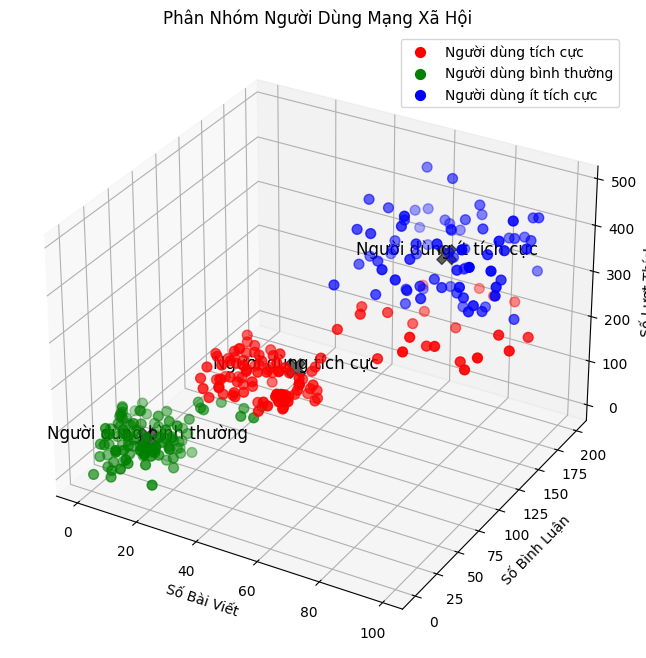

Mean Square Error: 2696.1590582046297


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Tạo DataFrame
du_lieu = pd.read_csv(r"C:\Users\FPTSHOP\Downloads\du_lieu_gia_lap.csv")
print(du_lieu)

# Chuyển DataFrame thành mảng numpy
data = du_lieu.values

# Khởi tạo centroids
def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

# Gán nhãn cho các điểm dữ liệu
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = np.linalg.norm(point - centroids, axis=1)
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

# Cập nhật centroids
def update_centroids(data, clusters, k):
    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        points = data[clusters == i]
        new_centroids[i] = np.mean(points, axis=0)
    return new_centroids

# Tính Mean Square Error (MSE)
def calculate_mse(data, centroids, clusters):
    mse = 0
    for i in range(len(data)):
        centroid = centroids[clusters[i]]
        mse += np.linalg.norm(data[i] - centroid) ** 2
    mse /= len(data)
    return mse

# K-means
def kmeans(data, k, max_iters=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    mse = calculate_mse(data, centroids, clusters)
    return centroids, clusters, mse

# Áp dụng K-means
k = 3
centroids, clusters, mse = kmeans(data, k)

# Gán nhãn cho các cụm
labels = ['Người dùng tích cực', 'Người dùng bình thường', 'Người dùng ít tích cực']

# Trực quan hóa kết quả
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']

for i in range(k):
    clustered_data = data[clusters == i]
    ax.scatter(clustered_data[:, 0], clustered_data[:, 1], clustered_data[:, 2], 
               c=colors[i], label=labels[i], s=50)

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='black', s=200, alpha=0.6, marker='X')

for i, txt in enumerate(labels):
    ax.text(centroids[i, 0], centroids[i, 1], centroids[i, 2], 
            txt, fontsize=12, ha='center')

ax.set_xlabel('Số Bài Viết')
ax.set_ylabel('Số Bình Luận')
ax.set_zlabel('Số Lượt Thích')
ax.set_title('Phân Nhóm Người Dùng Mạng Xã Hội')
ax.legend()
plt.show()

print(f"Mean Square Error: {mse}")
